In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


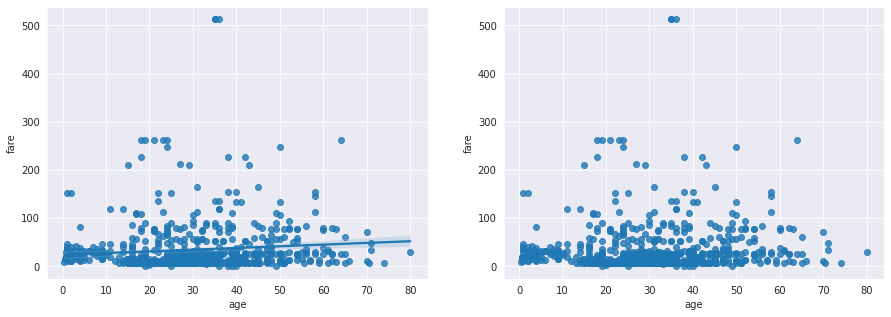

In [6]:
sns.set_style('darkgrid')  # darkgrid, whitegrid, dark, white, ticks 기본 5개
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 그래프 그리기 - 선형회귀
sns.regplot(x='age', y='fare', data=titanic, ax=ax1)
sns.regplot(x='age', y='fare', data=titanic, ax=ax2, fit_reg=False)
plt.show()

In [8]:
# heat map
flights = sns.load_dataset('flights')
flights_passenger = flights.pivot('month', 'year', 'passengers')  # 데이터 변형 툴
flights.head() # 1949~1960년까지 월별 여객기 애용승객수

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn

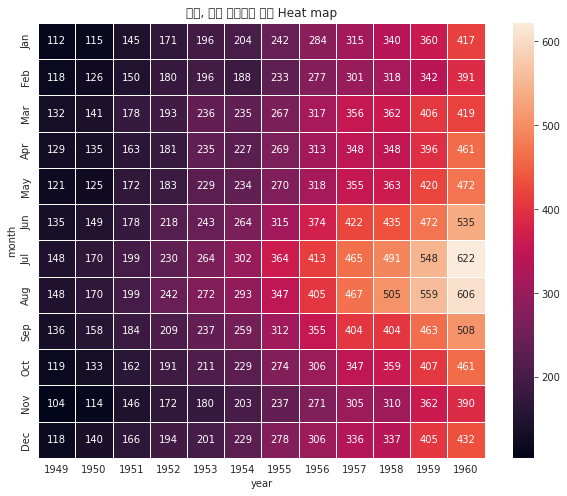

In [10]:
# 
plt.figure(figsize=(10,8))
plt.title('연도, 월별 승객수에 대한 Heat map')
sns.heatmap(flights_passenger, annot=True, fmt='d', linewidths=1)
plt.show()

<class 'matplotlib.axes._axes.Axes'>


Text(0.5, 1.0, 'Swarmplot')

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


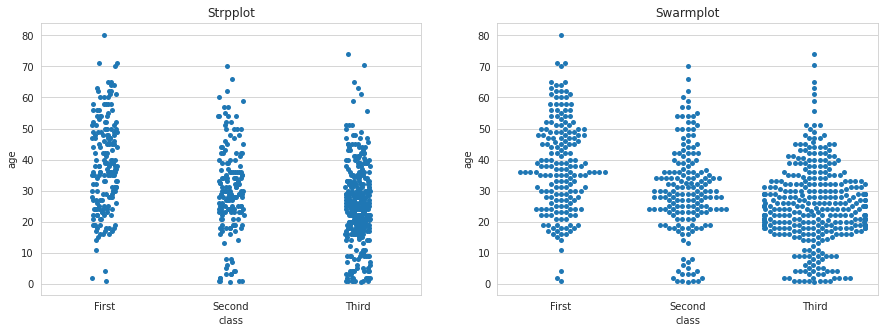

In [14]:
# seaborn의 scatter
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
print(type(ax1))

# 이산형 변수의 분포 - 데이터의 분산 미고려
sns.stripplot(x='class', y='age', data=titanic, ax=ax1)
# 이산형 변수의 분포 - 데이터의 분산 고려
sns.swarmplot(x='class', y='age', data=titanic, ax=ax2)

ax1.set_title('Strpplot')
ax2.set_title('Swarmplot')


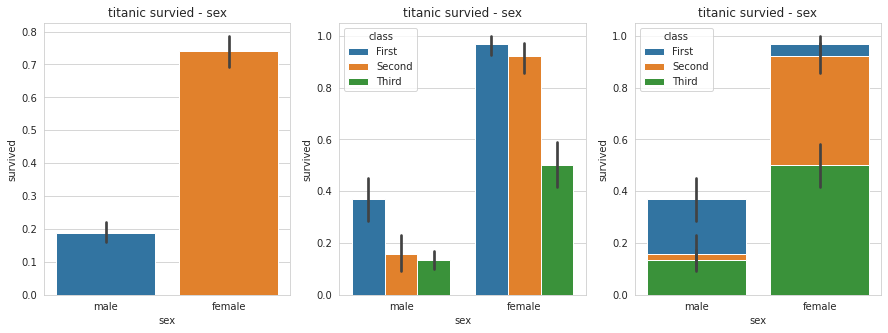

In [29]:
# seaborn bar plot, 검은색선 = 95% 신뢰구간
# x축 y축에 변수를 할당
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
#print(type(ax1))
#titanic['sex','survived']
# x축과 y축에 변수를 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)
ax1.set_title('titanic survied - sex')
# x축과 y축에 변수를 할당, hue 옵션에 class
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)
ax2.set_title('titanic survied - sex')
# x축과 y축에 변수를 할당, hue 옵션에 class 누적으로 표시
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)
ax3.set_title('titanic survied - sex')
plt.show()

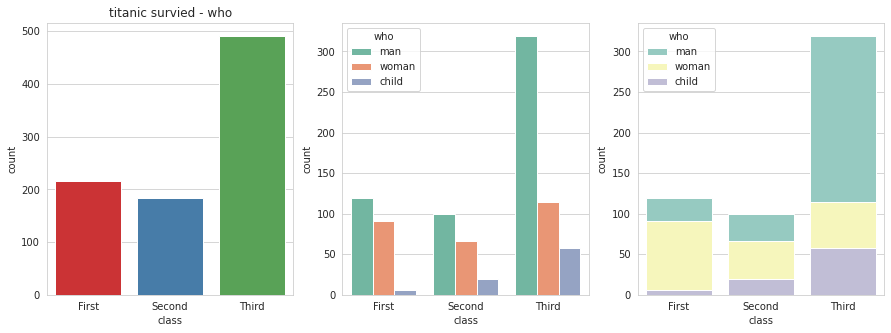

In [28]:
# seaborn count plot
# x축 y축에 변수를 할당
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
#print(type(ax1))

# x축과 y축에 변수를 할당
sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)
ax1.set_title('titanic class')

## x축과 y축에 변수를 할당, hue 옵션에 class
sns.countplot(x='class', palette='Set2', hue='who', data=titanic, ax=ax2)
ax1.set_title('titanic survied - who')

# x축과 y축에 변수를 할당, hue 옵션에 class 누적으로 표시
sns.countplot(x='class', palette='Set3', hue='who', dodge=False, data=titanic, ax=ax3)
plt.show()


In [30]:
#titanic

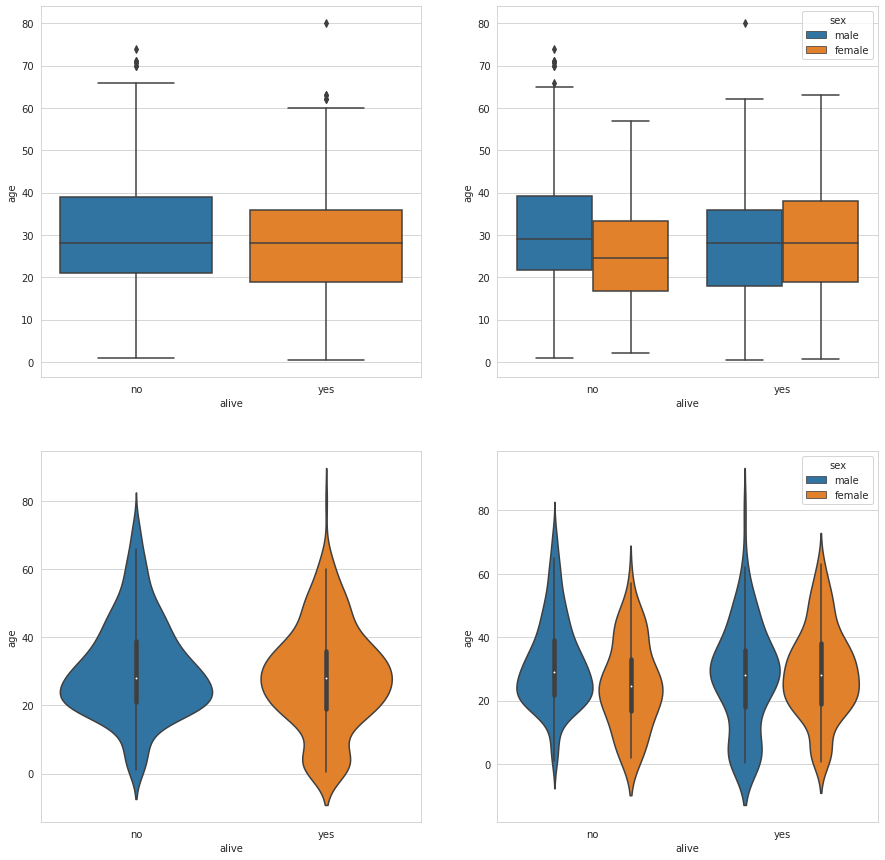

In [40]:
# seaborn box plot
# ax1 boxplot - 기본값,
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


# ax1
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)

# ax2
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)

# ax3
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)

# ax4
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4)

plt.show()


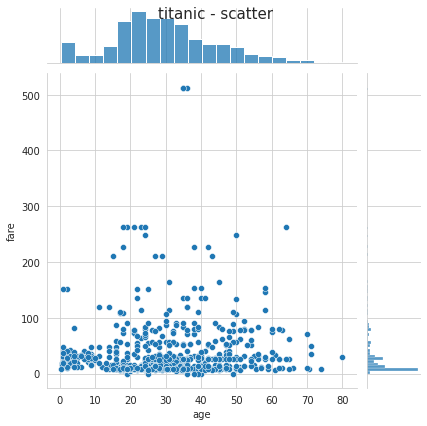

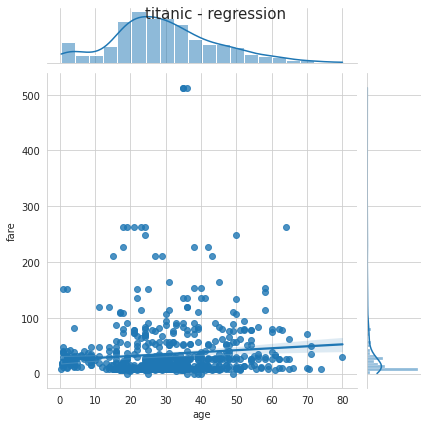

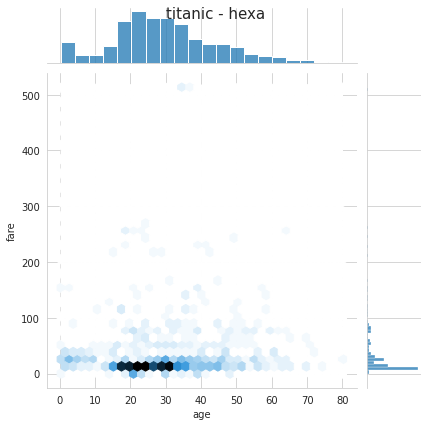

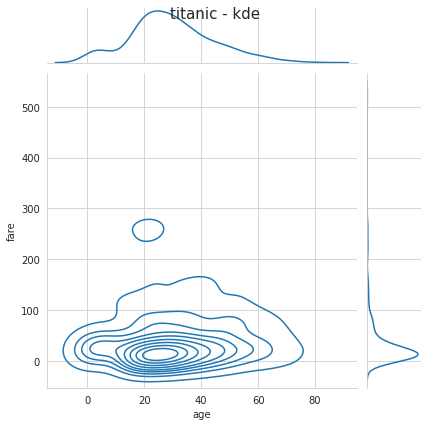

In [42]:
# joint plot : 산점도 + 히스토그램
sns.set_style('whitegrid')

# 조인트그래프 - 기본값
j1 = sns.jointplot(x='age', y='fare', data=titanic)
# 조인트그래프 - 회귀age
j2 = sns.jointplot(x='age', y='fare', kind='reg', data=titanic)
# 조인트그래프 - 육각age프
j3 = sns.jointplot(x='age', y='fare', kind='hex', data=titanic)
# 조인트그래프 - 커널age그래프
j4 = sns.jointplot(x='age', y='fare', kind='kde', data=titanic)

j1.fig.suptitle('titanic - scatter', size=15)
j2.fig.suptitle('titanic - regression', size=15)
j3.fig.suptitle('titanic - hexa', size=15)
j4.fig.suptitle('titanic - kde', size=15)
plt.show()

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


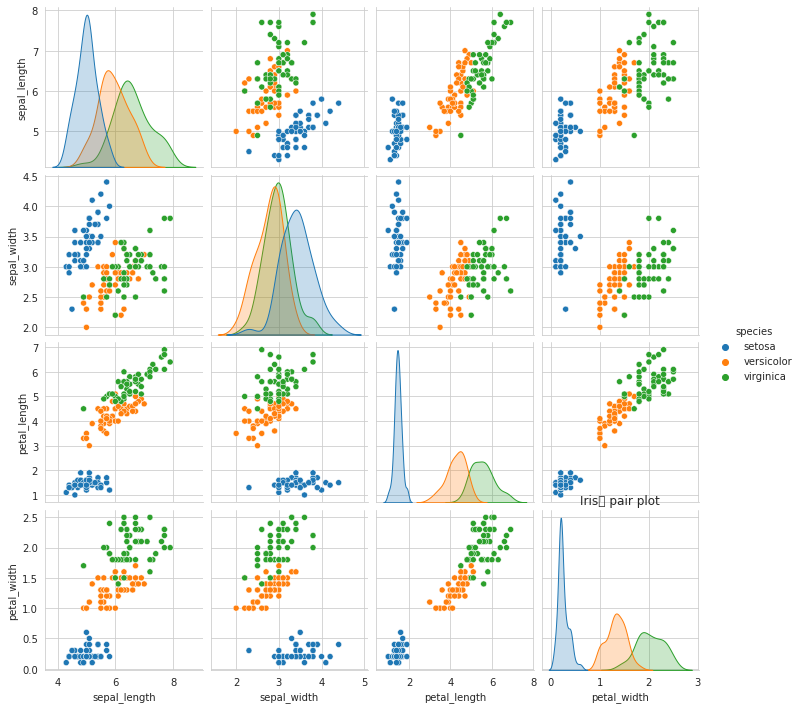

In [44]:
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species')
plt.title('Iris의 pair plot')
plt.show()

In [45]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
